#### Mastering Advanced Network Construction

In [ ]:

<img src="./images/synthetick network.png" alt="lib_compare" />

##### Adjacency Matrix

An adjacency matrix A is a square N×N matrix, where N is the size of the graph to
be defined. The row and column indexes indicate the source and target nodes,
respectively. Depending on the network type, the acceptable range, properties,
and interpretation of the matrix elements differ. If a network belongs to more
than one type (say, weighted and directed), consider all relevant properties and
interpretations (see table).

<img src="./images/Adjency_matrix.png" alt="lib_compare" />

<img src="./images/Adjency_matrix_tbl.png" alt="lib_compare" />

In [1]:
import networkx as nx
import numpy as np
from itertools import chain # For flattening the list of edges

In [3]:
A = np.array([[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1],[1,0,0,0,0]])

In [4]:
G = nx.DiGraph()
edges = chain.from_iterable([(i, j) for j, column in enumerate(row) \
                            if A[i][j]] for i, row in enumerate(A))
G.add_edges_from(edges)
print(G.edges(data=True))

[(0, 1, {}), (1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 0, {})]


By default, NetworkX assumes that all edges have the weight of 1, and does not
display weights as edge attributes. If the matrix represents signed or unsigned
weights (rather than absence/presence), you can modify the code to incorporate
the “weight” attribute:

In [5]:
G = nx.DiGraph()
edges = chain.from_iterable([(i, j,{'weight':A[i][j]}) for j, column in enumerate(row) \
                            if A[i][j]] for i, row in enumerate(A))
G.add_edges_from(edges)
print(G.edges(data=True))

[(0, 1, {'weight': 1}), (1, 2, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (4, 0, {'weight': 1})]


#### Create graph from Numpy

In [6]:
import numpy as np
# A_mtx = np.matrix(A)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
print(G.edges(data=True))

[(0, 1, {'weight': 1}), (1, 2, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (4, 0, {'weight': 1})]


You can program the reverse transformation with nx.to_numpy_matrix(G):

In [7]:
B_mtx = nx.to_numpy_matrix(G) # Produces a NumPy 2D matrix
print(B_mtx)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


#### To Pandas

Save graph data into pandas data frame

In [13]:
labels = "Born", "Married", "Elected Rep", "Elected Pres", "Died"
nx.relabel_nodes(G, dict(enumerate(labels)), copy=False)
df = nx.to_pandas_edgelist(G)
print(df)

         source        target  weight
0          Born       Married       1
1       Married   Elected Rep       1
2   Elected Rep  Elected Pres       1
3  Elected Pres          Died       1
4          Died          Born       1


In [14]:
import pandas as pd
df = pd.DataFrame({
"from": {0: "Died", 1: "Elected Rep", 2: "Married", 3: "Born",
4: "Elected Pres"},
"to": {0: "Born", 1: "Elected Pres", 2: "Elected Rep", 3: "Married",
4: "Died"},
"weight": {0: 0.1, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},
})
print(df)

           from            to  weight
0          Died          Born     0.1
1   Elected Rep  Elected Pres     1.0
2       Married   Elected Rep     1.0
3          Born       Married     1.0
4  Elected Pres          Died     1.0


[('Died', 'Born', {'weight': 0.1}), ('Died', 'Elected Pres', {'weight': 1.0}), ('Born', 'Married', {'weight': 1.0}), ('Elected Rep', 'Elected Pres', {'weight': 1.0}), ('Elected Rep', 'Married', {'weight': 1.0})]


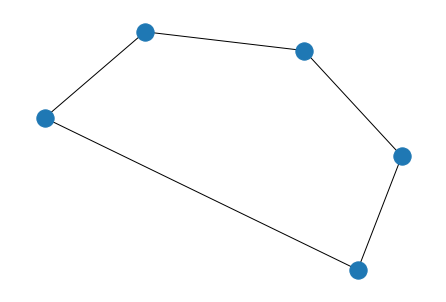

In [18]:
G = nx.from_pandas_edgelist(df, "from", "to", edge_attr=["weight"])
# print(G.edges(data=True))
nx.draw(G)

#### Handling Node Attributes, the Pandas Way

In [20]:
events = {"Died": 1865, "Born": 1809, "Elected Rep": 1847,
"Elected Pres": 1861, "Married": 1842}
nx.set_node_attributes(G=G, values=events,name="date") #  G, values, name=None
node_data = G.nodes(data=True)
print(node_data)

[('Died', {'date': 1865}), ('Born', {'date': 1809}), ('Elected Rep', {'date': 1847}), ('Elected Pres', {'date': 1861}), ('Married', {'date': 1842})]


The values of node attributes, especially those calculated by the analysis
program, may become inputs to further data analysis steps

In [21]:
lincoln_ser = pd.DataFrame(node_data).set_index(0)[1]
print(lincoln_ser)

0
Died            {'date': 1865}
Born            {'date': 1809}
Elected Rep     {'date': 1847}
Elected Pres    {'date': 1861}
Married         {'date': 1842}
Name: 1, dtype: object


After converting the node labels to the row index, the resulting DataFrame has
only one column named 1 (which, naturally, is a Series). The values in the
column are node attribute dictionaries, and one of the Series constructors builds a
Series from a dictionary. Let’s apply the constructor to each row.

In [22]:
df = lincoln_ser.apply(pd.Series)
print(df)

              date
0                 
Died          1865
Born          1809
Elected Rep   1847
Elected Pres  1861
Married       1842


### Incidence Matrix

An incidence matrix J is a rectangular N×M matrix, where N is the number of
nodes and M is the number of edges. A 1 at J[i,j] means that the node i is incident
to the edge j. All other elements of J are 0s. If the represented graph is directed,
the start node is designated with 1 and the end node with -1.

Unlike an adjacency matrix, an incidence matrix easily allows parallel edges.
However, it has its weak points: weighted networks cannot be represented, and
an incidence matrix of a typical complex network has a larger memory footprint
than the adjacency matrix of the same network.

Function nx.incidence_matrix(G) returns the incidence matrix of G as a so-called
sparse matrix. (Pass the optional parameter oriented=True to distinguish start and
end nodes.) You can convert a sparse matrix to a dense one with G.todense:

Here’s how we read the results: edge number 0 starts at node 1 (because
J[1,0]==1) and ends at node 0 (because J[0,0]==-1); edge number 1 starts at node 2
(because J[2,1]==1) and ends at node 1 (because J[1,1]==-1), and so on.

In [23]:
J = nx.incidence_matrix(G, oriented=True).todense()
print(J)

[[-1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 0.  0.  0. -1. -1.]
 [ 0.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.]]


#### Work with Edge Lists and Node Dictionaries

You do not have to mess with matrices, NumPy, and Pandas to bulk move data
between your code and NetworkX networks. You can use edge lists and node
dictionaries.

#### Edge Lists
An edge list is a list of 3-tuples containing the start node, end node, and a
dictionary of edge attributes for each edge

In [16]:
def get_graph():
    import pandas as pd
    import networkx as nx
    df = pd.DataFrame({
    "from": {0: "Died", 1: "Elected Rep", 2: "Married", 3: "Born",
    4: "Elected Pres"},
    "to": {0: "Born", 1: "Elected Pres", 2: "Elected Rep", 3: "Married",
    4: "Died"},
    "weight": {0: 0.1, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0},
    })

    G = nx.from_pandas_edgelist(df, "from", "to", edge_attr=["weight"])
    # print(G.edges(data=True))
    # nx.draw(G)
    return(G)

In [22]:
G = get_graph()
edges = nx.to_edgelist(G)
F = nx.from_edgelist(edges, create_using=G)
print(F.edges(data=True))
G = get_graph()
print(G.edges(data=True))

[]
[('Died', 'Born', {'weight': 0.1}), ('Died', 'Elected Pres', {'weight': 1.0}), ('Born', 'Married', {'weight': 1.0}), ('Elected Rep', 'Elected Pres', {'weight': 1.0}), ('Elected Rep', 'Married', {'weight': 1.0})]


The pair of the edge list-related functions is reversible: a graph A, created from
an edge list extracted from another graph B, is equal to B. Equality of graphs in
mathematical graph theory is called isomorphism. Two graphs are isomorphic if
you align all of the nodes of one graph with all of the nodes of the other graph,
and all of their edges will align, too.

In [23]:
print(nx.is_isomorphic(F, G))

False


#### Dictionary of Lists

A dictionary of lists of nodes is what it says it is. All nodes in a graph are the
keys, and lists of adjacent nodes are values. You can get a dictionary of lists with
nx.to_dict_of_lists:

In [20]:
G = get_graph()
dict_list = nx.to_dict_of_lists(G)
print(dict_list)

{'Died': ['Born', 'Elected Pres'], 'Born': ['Died', 'Married'], 'Elected Rep': ['Elected Pres', 'Married'], 'Elected Pres': ['Elected Rep', 'Died'], 'Married': ['Elected Rep', 'Born']}


nx.to_dict_of_lists does not externalize edge attributes, including width, and this
makes the resulting dictionary unsuitable for recreating the original graph with
nx.from_dict_of_lists. It is true that the new graph is isomorphic to the source, but
the function nx.is_isomorphic looks only at the topology of the graphs and does not
compare the attributes.

In [24]:
F = nx.from_dict_of_lists(dict_list, create_using=G)
nx.is_isomorphic(F, G)

True

#### Generate Synthetic Networks

The first four functions need to know the total number of nodes. There is only
one way to generate the edges for these types of graphs. For a balanced tree, you
must provide the branching factor r (the number of children of a non-leaf node)
and the height h (the height does not include the root node of the tree). A
balanced tree has r^(h+1)  -1 nodes. In our example, G2 is a five-level binary tree with
25+1-1=63 nodes. To build a two-dimensional grid (mesh) like G3, specify the
number of rows n and columns m, and get a graph with m×n nodes.

In [ ]:
G0 = nx. path_graph(20)
G1 = nx. cycle_graph(20)
G4 = nx. star_graph(20)
G5 = nx.complete_graph(20)
G2 = nx. balanced_tree(2, 5)
G3 = nx. grid_2d_graph(5, 4)
names = ("Linear (Path)", "Ring (Cycle)", "Balanced Tree", "Mesh (Grid)",
"Star", "Complete")

All four functions need to know the total graph size. The remaining parameters
characterize the random nature of the interconnecting edges:
* For Erdös--Rényi: the probability of edge creation. Incidentally, it equals
the graph density (Start with Global Measures).
* For Watts--Strogatz: the initial number of neighbors and the probability of
edge rewiring
* For Barabási--Albert: the number of edges to attach from a new node
* For Holme--Kim: the same as above, plus the probability of adding a
triangle for each added edge

In [ ]:
# Generate and draw random networks
G0 = nx. erdos_renyi_graph(50, 0.05)
G1 = nx.connected_watts_strogatz_graph(50, 4, 0.5 )
G2 = nx. barabasi_albert_graph(50, 4 )
G3 = nx. powerlaw_cluster_graph(50, 4, 0.5 )
names = ("Erdös-Rényi (p=0.05)", "Watts-Strogatz (k=4, p=0.5)",
"Barabási-Albert (k=4)", "Holme-Kim (k=4, p=0.5)")

The remaining three generators produce “famous” social networks that were
initially constructed by field sociologists based on experimental data, but
eventually became “gold standards” of social network research.

In [ ]:
# Generate and draw famous social networks
G0 = nx.karate_club_graph()
G1 = nx.davis_southern_women_graph()
G2 = nx.florentine_families_graph()
names = ("Zachary's Karate Club", "Davis Southern women",
"Florentine families")

#### Slice Weighted Networks

Lucky network analysts work with unweighted networks. In an unweighted
network, all edges are equal. You consider either all of them, and get what you
get—or none of them, and get a network with no edges.
Unlucky network analysts work with weighted (and possibly signed) networks.
In a weighted network, some edges are strong, and some are weak. If you keep
all edges, you will have a distorted view of the network because there are
algorithms that do not discriminate edges by weight. For them, an edge with a
weight of 1.00 (to your best life-long friend) has the same importance as another
edge with a weight of 0.01 (to the guy who takes the same 7:00 a.m. bus, always
sits in the back, and reads Alaska Dispatch News).

Most network analysts are unlucky and have to slice their networks.
Slicing is the process of eliminating low-strength edges (weak ties). In the
simplest form, you choose a cut-off threshold T that controls the density of the
resulting network. Each edge’s weight is compared to the threshold. If the
weight is at or above the threshold, the edge remains in the network; otherwise,
it is erased.

NetworkX does not provide a standard slicing routine, but you can quickly
implement yours (will do later). However, first, you should decide on the value
of T. If the cut-off is too high, the network falls apart into tiny disjoint fragments;
if it is too low, the network becomes a hairball with no analyzable structure. The
trial-and-error approach may be the best:

1. Select a T based, say, on the edge weight distribution.
2. Slice the network.
3. Get some measurements (the number of fragments, density, and so on).
4. If the results do not suit you, go back to square one.


<img src="./images/slice_weight_network.png" alt="lib_compare" />

In [29]:
def slice_network(G, T, copy=True):
    """
    Remove all edges with weight<T from G or its copy.
    """
    F = G.copy() if copy else G
    F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < T])
    return F

G= get_graph()
F = slice_network(G, 0.9)
print(F.edges())

[('Died', 'Elected Pres'), ('Born', 'Married'), ('Elected Rep', 'Elected Pres'), ('Elected Rep', 'Married')]
